Exercise 9 - Advanced Neural Networks
==========

There are many factors that influence how well a neural network might perform. AI practitioners tend to play around with the structure of the hidden layers, the activation functions used, and the optimisation function.

In this exercise we will look at how changing these parameters impacts the accuracy performance of our network.

Step 1
------

In this exercise we will use the same dog dataset as in exercise 8, building on what we learnt before and trying different parameters for a network to try and improve performance.

Let's start by opening up our data set and setting up our train and test sets.

In [1]:
# Run this!

# Here we set a randomisation seed for replicatability.
import os
os.environ['PYTHONHASHSEED'] = '0'
seed = 6
import random as rn
rn.seed(seed)
import numpy as np
np.random.seed(seed)

import warnings
warnings.filterwarnings("ignore")
import tensorflow.compat.v1 as tf
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

import tensorflow.compat.v1.keras.backend as K

import keras
tf.set_random_seed(seed)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

print('keras using %s backend'%keras.backend.backend())
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Sets up the graphing configuration
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Using TensorFlow backend.


keras using tensorflow backend


In [2]:
# Run this too!
# This gets our data ready

# Load the data
data = pd.read_csv('Data/dog_data.csv')

# Separate out the features
features = data.drop(['breed'], axis = 1)

# Sets the target one-hot vectors
target = OneHotEncoder(sparse = False).fit_transform(np.transpose([data['breed']]))

# Take the first 4/5 of the data and assign it to training
train_X = features.values[:160]
train_Y = target[:160]

# Take the last 1/5 of the data and assign it to testing
test_X = features.values[160:]
test_Y = target[160:]

Step 2
------

The box below contains methods to help us quickly change the structure. Don't edit them - just run the box.

The __train_network__ method allows us to change:
* the number of layers
* the activation functions the layers use
* the optimizer of the model
* the number of training cycles for the model (__epochs__)

The plot_acc and bar_acc just plot our models so we can easily see how well they do.

Don't worry about the code - it is simply to make the next steps easier.

In [3]:
# Run this!
# Below are a few helper methods. Do not edit these.

def train_network(structure, activation, optimizer, epochs):
    
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed)
    np.random.seed(seed)
    tf.set_random_seed(seed)
    K.set_session(sess)
    
    # This initialises the model
    model = keras.models.Sequential()
    
    # This is our input + the first hidden layer 1
    model.add(keras.layers.Dense(units = structure[1], input_dim = structure[0], activation = activation)) 
    
    # Hidden layer 2, if not ignored (of size 0)
    if structure[2] > 0:
        model.add(keras.layers.Dense(units = structure[2], activation = activation))
        
    # Output layer
    model.add(keras.layers.Dense(units=structure[-1], activation = tf.nn.softmax))
    
    # Compiles the model with parameters
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    # This tells the us training has started, so we know that it's actually running
    print('training... ', end = '')

    # This trains the network
    training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = epochs, verbose = 0, shuffle = False)
    
    # Results!
    print('train_acc: %0.3f, test_acc: %0.3f' %(training_stats.history['accuracy'][-1], 
                                                model.evaluate(test_X, test_Y, verbose = 0)[1]))
    
    # This returns the results and the model for use outside the function
    return training_stats, model

# Plots our evaluations in a line graph to see how they compare
def plot_acc(train_acc, test_acc, title):
    # Plots the training and testing accuracy lines
    training_accuracy, = graph.plot(train_acc, label = 'Training Accuracy')
    testing_accuracy, = graph.plot(test_acc, label = 'Testing Accuracy')
    graph.legend(handles = [training_accuracy, testing_accuracy])
    
    # Plots guide lines along y = 0 and y = 1 to help visualise
    xp = np.linspace(0, train_acc.shape[0] - 1, 10 * train_acc.shape[0])
    graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
    graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
    
    graph.xticks(range(0, train_acc.shape[0]), range(1, train_acc.shape[0] + 1))
    graph.ylim(0,1)
    graph.title(title)
    
    graph.show()

# Plots our evaluations in a bar chart to see how they compare
def bar_acc(train_acc, test_acc, title, xticks):
    index = range(1, train_acc.shape[0] + 1)
    
    # Plots the training and testing accuracy bars
    training_accuracy = graph.bar(index, train_acc, 0.4, align = 'center')
    testing_accuracy = graph.bar(index, test_acc, 0.4, align = 'edge')
    graph.legend((training_accuracy[0], testing_accuracy[0]), ('Training Accuracy', 'Testing Accuracy'))
    
    graph.xticks(index, xticks)
    graph.title(title)
    
    graph.show()

Step 3
------

Let's first look at how different layer sizes impact performance.

Let's look at a network with just one hidden layer. We'll see how it performs with 1 to 10 nodes.

Evaluating model with 1 hidden neurons... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with 2 hidden neurons... training... train_acc: 0.556, test_acc: 0.575
Evaluating model with 3 hidden neurons... training... train_acc: 0.681, test_acc: 0.525
Evaluating model with 4 hidden neurons... training... train_acc: 0.581, test_acc: 0.475
Evaluating model with 5 hidden neurons... training... train_acc: 0.887, test_acc: 0.750
Evaluating model with 6 hidden neurons... training... train_acc: 0.944, test_acc: 0.975
Evaluating model with 7 hidden neurons... training... train_acc: 0.637, test_acc: 0.575
Evaluating model with 8 hidden neurons... training... train_acc: 0.962, test_acc: 0.950
Evaluating model with 9 hidden neurons... training... train_acc: 0.962, test_acc: 0.850
Evaluating model with 10 hidden neurons... training... train_acc: 0.969, test_acc: 0.950


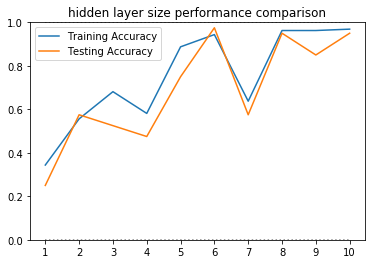

In [4]:
# Initialises empty arrays into which to append new values.
train_acc = np.empty((0))
test_acc = np.empty((0))

for hidden1 in range (1,11):
    print('Evaluating model with %i hidden neurons... ' %hidden1, end = '')

###--- REPLACE THE ???'s BELOW WITH hidden1 ---###
    training_stats, model = train_network(structure = [3, hidden1, hidden1, 3], 
                                          activation = 'relu', optimizer = 'RMSprop', epochs = 12)
###
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose = 0)[1])


###--- REPLACE THE ???s BELOW WITH train_acc AND THEN test_acc ---###
plot_acc(train_acc, test_acc, 'hidden layer size performance comparison')
###

So, experimenting with different sizes of hidden layers can dramatically improve your results.

Step 4
------

Now we'll look at how different activation functions impact the performance.

There's lots we will try, just remember it is common to try both `relu` and `tanh` first.

Evaluating model with elu hidden layer activation function... training... train_acc: 0.938, test_acc: 0.900
Evaluating model with selu hidden layer activation function... training... train_acc: 0.944, test_acc: 0.900
Evaluating model with relu hidden layer activation function... training... train_acc: 0.631, test_acc: 0.575
Evaluating model with tanh hidden layer activation function... training... train_acc: 0.675, test_acc: 0.600
Evaluating model with sigmoid hidden layer activation function... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with hard_sigmoid hidden layer activation function... training... WARNING:tensorflow:From /home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
train_acc: 0.319, test_a

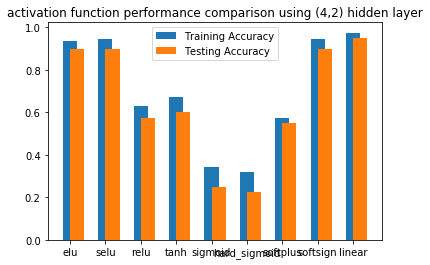

In [6]:
train_acc = np.empty((0))
test_acc = np.empty((0))

# Makes a list of the activation functions we wish to compare
activation_functions = ['elu', 'selu', 'relu', 'tanh', 'sigmoid', 
                        'hard_sigmoid', 'softplus', 'softsign', 'linear']

for activation in activation_functions:
    print('Evaluating model with %s hidden layer activation function... ' %activation, end = '')

###--- REPLACE THE ??? BELOW WITH activation ---###
    training_stats, model = train_network(structure = [3, 4, 2, 3],
                                          activation = activation, optimizer = 'RMSprop', epochs = 12)
###
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])
    
###--- REPLACE THE ??? BELOW WITH activation_functions ---###
bar_acc(train_acc, test_acc, 'activation function performance comparison using (4,2) hidden layer', activation_functions)
###

There's quite a lot of variance there. It's always good to quickly test different activation functions first.

Next, lets try changing the shape of the hidden layers.

Evaluating model with elu hidden layer activation function... training... train_acc: 0.719, test_acc: 0.550
Evaluating model with selu hidden layer activation function... training... train_acc: 0.681, test_acc: 0.600
Evaluating model with relu hidden layer activation function... training... train_acc: 0.681, test_acc: 0.525
Evaluating model with tanh hidden layer activation function... training... train_acc: 0.306, test_acc: 0.250
Evaluating model with sigmoid hidden layer activation function... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with hard_sigmoid hidden layer activation function... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with softplus hidden layer activation function... training... train_acc: 0.706, test_acc: 0.525
Evaluating model with softsign hidden layer activation function... training... train_acc: 0.306, test_acc: 0.250
Evaluating model with linear hidden layer activation function... training... train_acc: 0.656, test_acc: 0.575

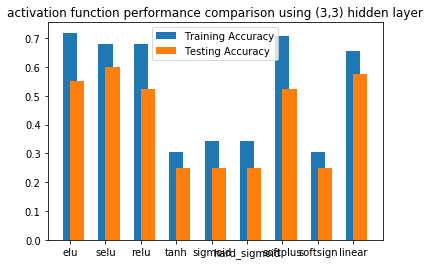

In [8]:
train_acc = np.empty((0))
test_acc = np.empty((0))

activation_functions = ['elu', 'selu', 'relu', 'tanh', 'sigmoid',
                        'hard_sigmoid', 'softplus', 'softsign', 'linear']

for activation in activation_functions:
    print('Evaluating model with %s hidden layer activation function... ' %activation, end='')
    
# The ???'s below will change the size of the hidden layers. Lets try changing them both to 3 for now
# (but you can have a play around with different numbers if you want)
###--- REPLACE THE ???s BELOW WITH 3 ---###
    training_stats, model = train_network(structure = [3, 3, 3, 3], 
                                          activation = activation, optimizer = 'RMSprop', epochs = 12)
###
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])
    
bar_acc(train_acc, test_acc, 'activation function performance comparison using (3,3) hidden layer', activation_functions)

Step 5
-----

The __optimisation function__ is the last major parameter of the network architecture. It changes how the network is trained - so it can have a __very large impact on training time and end performance__.

Note: this step won't always provide the same results every time it is run. Optimizers such as SGD give different results with Keras and TensorFlow currently.

Evaluating model with SGD optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with RMSprop optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with Adagrad optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with Adadelta optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with Adam optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with Adamax optimizer... training... train_acc: 0.756, test_acc: 0.900
Evaluating model with Nadam optimizer... training... train_acc: 0.756, test_acc: 0.900


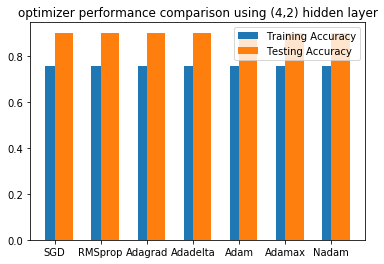

In [10]:
train_acc = np.empty((0))
test_acc = np.empty((0))

# This is a list of the optimisation functions for us to compare
optimization_functions = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                          'Adam', 'Adamax', 'Nadam']

for optimizer in optimization_functions:
    print('Evaluating model with %s optimizer... ' %optimizer, end='')
    
    
# The ??? below is where we specify the optimizer in the code    
###--- REPLACE THE ??? BELOW WITH optimizer ---###
    training_stats, model = train_network(structure = [3, 4, 2, 3],
                                          activation = 'relu', optimizer = 'SGD', epochs = 12)
###

# This is recording our data for the plot
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])

# And now, the plot!    
bar_acc(train_acc, test_acc, 'optimizer performance comparison using (4,2) hidden layer', optimization_functions)

Step 6
-------

Let's try to combine what we've seen above and try to create a neural network that performs better than what we made in exercise 7, where we used the structure `[3,4,2,3]`, the activation function `relu`, and the optimiser `SGD` (Stochastic Gradient Descent).

training... train_acc: 0.925, test_acc: 0.975


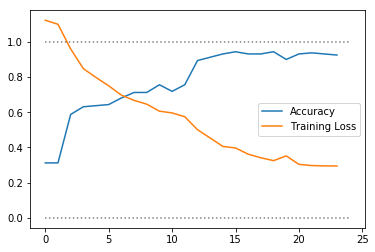

In [12]:
###--- REPLACE THE ???s BELOW WITH PARAMETERS TO TEST A NEW NEURAL NETWORK ---###
structure = [3, 4 , 2 , 3] # e.g. [3,4,2,3]
activation = 'relu' # e.g. 'relu', 'softsign', 'tanh', 'elu', 'selu', 'softplus', 'linear'
optimizer = 'SGD' # e.g. 'SGD', 'adam', 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam'
###

training_stats, model = train_network(structure, activation, optimizer, epochs = 24)

# We can plot our training statistics to see how it developed over time
accuracy, = graph.plot(training_stats.history['accuracy'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

How does it look? Were we able to beat the other network? Try out a number of different configurations to see how they perform!

Conclusion
-------

We've compared how different neural network architecture parameters influence accuracy performance, and we've tried to combine them in such a way that we maximise this performance.